In [1]:
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('/kaggle/input/real-world-smartphones-dataset/smartphones.csv')
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [4]:
df.shape

(980, 22)

In [5]:
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


# Data Visualization

In [6]:
palette = ['#1A5276', '#1F618D', '#5499C7', '#76D7C4', '#48C9B0']
sns.set_palette(palette)

# Set a dark background color using 'plotly_dark'
sns.set_style("darkgrid")

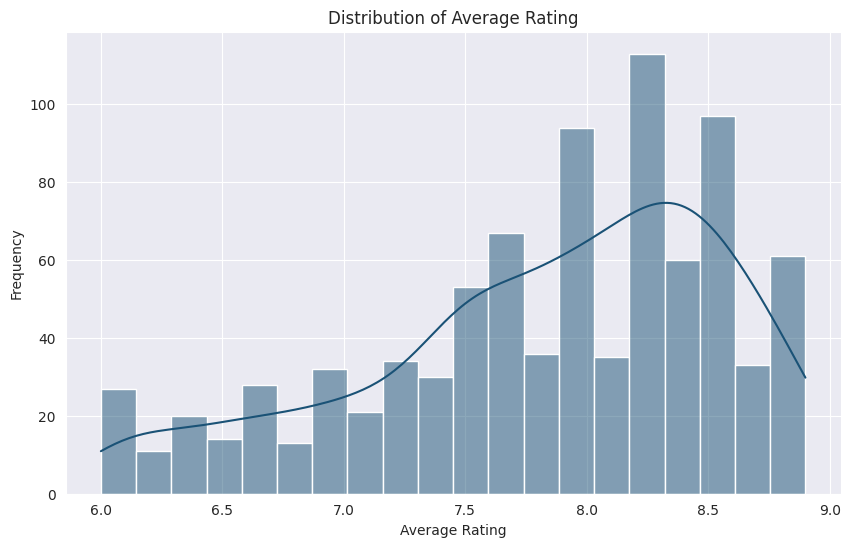

In [7]:
# Plot 1: Distribution of Average Ratings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore',category=FutureWarning)
    plt.figure(figsize=(10,6))
    sns.histplot(df['avg_rating'],bins=20,kde=True,color=palette[0])
    plt.title('Distribution of Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Frequency')
    plt.show()

The histogram indicates that most mobiles in the dataset have an average rating around 8.5.

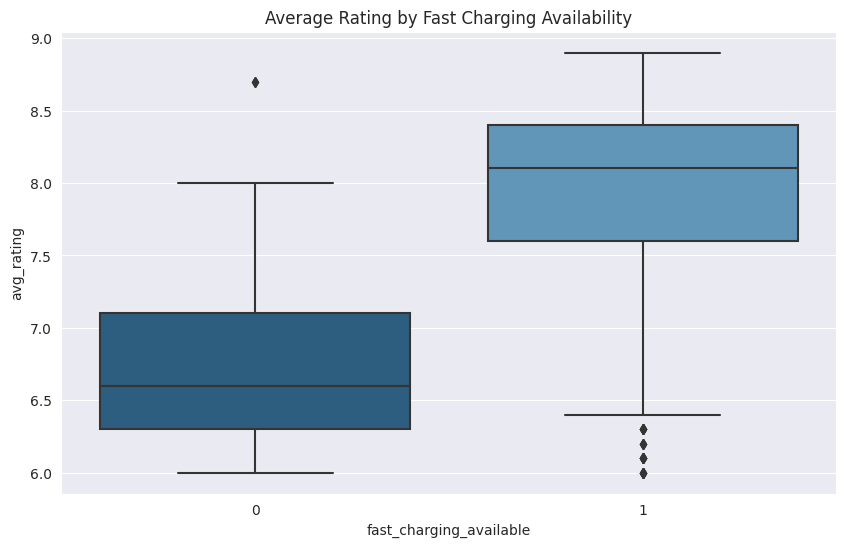

In [8]:
# Plot 2: Box Plot for Fast Charging Aviliability (Seaborn)
plt.figure(figsize=(10, 6))
sns.boxplot(x='fast_charging_available', y='avg_rating', data=df, palette=[palette[1], palette[2]])
plt.title('Average Rating by Fast Charging Availability')
plt.show()

Mobiles with fast charging capability tend to have higher average ratings, as known in the box plot.

In [9]:
battery_capacity_bins = [0, 3000, 4000, 5000, 6000, 7000, 8000, 9000, float('inf')]
battery_capacity_labels = ['<3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '>=9000']

df['battery_capacity_group'] = pd.cut(df['battery_capacity'], bins=battery_capacity_bins, labels=battery_capacity_labels, right=False)

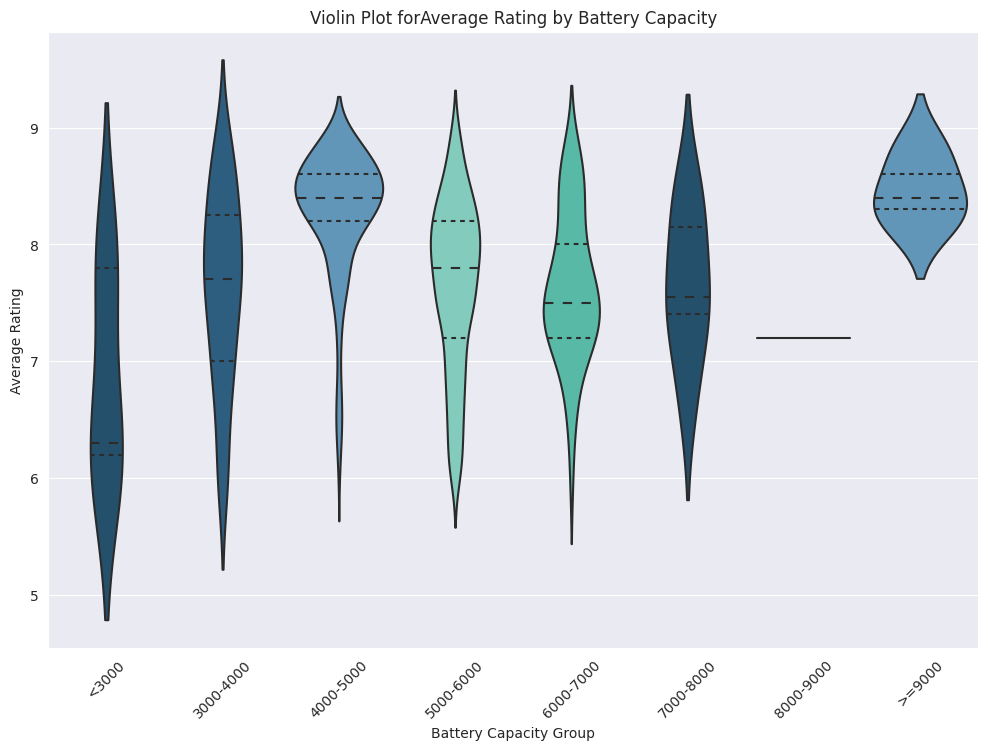

In [10]:
# Plot 3: Violin Plot with GroupedBattery Capacity (Seaborn)
plt.figure(figsize=(12,8))

# Suppress FutureWarnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.violinplot(x='battery_capacity_group',y='avg_rating', data=df, palette=palette, inner='quartile',observed=False)
    
    plt.title('Violin Plot forAverage Rating by Battery Capacity')
    plt.xlabel('Battery Capacity Group')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

**Generally, mobiles with higher battery capacity receive better ratings. This is evident in the violin plot, where higher battery capacity groups correspond to higher average ratings.**

In [11]:
# Plot 4: Scatter Plots (Plotly)
import plotly.express as px

fig = px.scatter(df, x='processor_speed',y='avg_rating',trendline="ols",title='Scatter Plot',
                labels={'processor_speed':'Processor Speed','avg_rating':'Average Rating'},
                color='avg_rating',color_continuous_scale='viridis')
fig.update_layout(template='plotly_dark')
fig.show()

**Mobiles with a processor speed above 2.5 GHz tend to receive higher ratings, as observed in the scatter plot with a trendline.**

In [12]:
# Plot 5: Bubble Chart for Resolution Trends (Plotly)
fig = px.scatter(df,x='resolution_width',y='avg_rating',size='resolution_height',
                title='Resolution Trends',
                labels={'resolution_width':'Resolution Width','avg_rating':'Average Rating'},
                size_max=20, color='avg_rating',color_continuous_scale='blues')
fig.update_layout(template='plotly_dark',showlegend=False)
fig.show()

**Mobiles with a resolution width between 1080 and 1400 exhibit higher average ratings, as depicated in the bubble chart for resolution trends.**

# Final Findings

After exploring the dataset and creating visualizations, here are the key findings:

**Distribution of Average Ratings**
The histogram indicates that most mobiles in the dataset have an average rating around 8.5.

**Fast Charging Availability**
Mobiles with fast charging capability tend to have higher average ratings, as shown in the box plot.

**Battery Capacity**
Generally, mobiles with higher battery capacity receive better ratings. This is evident in the violin plot, where higher battery capacity groups correspond to higher average ratings.

**Processor Speed**
Mobiles with a processor speed above 2.5 GHz tend to receive higher ratings, as observed in the scatter plot with a trendline.

**Resolution Trends**
Mobiles with a resolution width between 1080 and 1400 exhibit higher average ratings, as depicted in the bubble chart for resolution trends.

**Credit**:
https://www.kaggle.com/code/muzammilbaloch/smartphone-data-analysis